# Pandas Course

In [1]:
import numpy as np
import pandas as pd

## 1. Array
A array can be a one dimensional array (row), or an ndimensional array

In [2]:
sample_array = np.random.rand(3)
sample_array

array([0.34133224, 0.17746337, 0.67271822])

## 2. Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

```python
s = pd.Series(data, index=index)
```

### 2.1 Series data
Here, data can be many different things:

* a Python dict
* an ndarray
* a scalar value (like 5)

#### 2.1.1 Array

In [3]:
sample_series = pd.Series([1,2,3])
sample_series

0    1
1    2
2    3
dtype: int64

In [4]:
sample_series_array = pd.Series(sample_array)
sample_series_array

0    0.341332
1    0.177463
2    0.672718
dtype: float64

#### 2.1.2 Dict

In [5]:
sample_series_dict = pd.Series({'a1': 2, 'a2': 'b'})
sample_series_dict

a1    2
a2    b
dtype: object

#### 2.1.3 Scalar

In [6]:
sample_series_scalar = pd.Series(5.1, index=['a', 'b', 'c', 'd', 'e'])
sample_series_scalar

a    5.1
b    5.1
c    5.1
d    5.1
e    5.1
dtype: float64

### 2.2 Index

In [7]:
sample_series = pd.Series([1,2,3], index=['a', 'b', 'c'])
sample_series

a    1
b    2
c    3
dtype: int64

## 2.3 Slicing

In [8]:
sample_series[0]

1

_Slicing more than one record, also slices the index_

In [9]:
sample_series[1:]

b    2
c    3
dtype: int64

As the series is indexed, it also behaves like a dictionary

In [10]:
sample_series['b']

2

In [11]:
sample_series.get('b')

2

In [12]:
sample_series.get('d', np.nan)

nan

## 2.4 Basic Operations

Basic operations can be done in series without the need of iterating through each element

In [13]:
sample_series + sample_series

a    2
b    4
c    6
dtype: int64

In [14]:
sample_series + 5

a    6
b    7
c    8
dtype: int64

---
## 3. DataFrames
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame
Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

## 3.1 Data
### 3.1.1 Union of 2 dictionaries of series

In [15]:
# Union of 2 dict of Series 
d = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}
sample_pd_df=pd.DataFrame(d)
sample_pd_df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


### 3.1.2 Union of Dictionary of Dictionaries

In [16]:
# Union of 2 Dict or dicts
d = {
    'one': {'a':1, 'b':2}, 'two': {'a':1, 'c':'d'}
}
sample_pd_df2=pd.DataFrame(d)
sample_pd_df2

,one,two
a,1.0,1
b,2.0,NaN
c,NaN,d


### 3.1.3 Union of Dictionary of Arrays

In [17]:
d = {'one': [1., 2., 3., 4.],'two': [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [18]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd']) # Adding Index

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### 3.1.3 Appending series

In [19]:
data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])

In [20]:
data[:] = [(1, 2., 'Hello'), (2, 3., "World")]
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [21]:
pd.DataFrame(data, index=['a', 'b'])

,A,B,C
a,1,2.0,b'Hello'
b,2,3.0,b'World'


---
## Importing Data

In [22]:
import os
df_sample =pd.read_csv(os.path.join('.', 'collection-master', 'artwork_data.csv'), nrows=5, index_col='id'
                      )
df_sample
# pd.read_csv(os.path.join('.', 'collection-master', 'artwork_data.csv'))

,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
id,,,,,,,,,,,,,,,,,,,
1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785.0,1922,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826.0,1919,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


In [23]:
columns_to_use = ['id', 'title', 'artist', 'medium', 'year', 'acquisitionYear', 'height', 'width', 'units']
df_sample_c =pd.read_csv(os.path.join('.', 'collection-master', 'artwork_data.csv'), nrows=5, index_col='id', 
                       usecols=columns_to_use
                      )
df_sample_c
df =pd.read_csv(os.path.join('.', 'collection-master', 'artwork_data.csv'), index_col='id', 
                       usecols=columns_to_use
                      )

/Users/angelsaiz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
df.to_pickle('df.pickle') ## save for later

In [25]:
import json
records  = [('Expresso', '5$'), ('Flat White', '$6')]
pd.DataFrame.from_records(records, columns=['Item', 'Value'], index='Item')

,Value
Item,
Expresso,5$
Flat White,$6


In [26]:
keys_to_use = ['id', 'all_artists', 'title', 'medium', 'acquisitionYear', 'height', 'width']
def get_record_from_file (filepath, keys_to_use):
    """Outputs tuple with record data given a json"""
    with open(filepath) as artwork_files:
        content= json.load(artwork_files)
    record = []
    for key in keys_to_use:
        record.append(content[key])
    return tuple(record)

sample_json = os.path.join('collection-master','artworks', 'a', '000', 'a00001-1035.json')

In [27]:
get_record_from_file(sample_json, keys_to_use)

(1035,
 'Robert Blake',
 'A Figure Bowing before a Seated Old Man with his Arm Outstretched in Benediction. Verso: Indecipherable Sketch',
 'Watercolour, ink, chalk and graphite on paper. Verso: graphite on paper',
 1922,
 '419',
 '394')

In [28]:
def read_artworks_from_json(keys_to_use):
    root = os.path.join('collection-master', 'artworks')
    
    artworks=[]
    
    for dirpath, dirnames, filenames in os.walk(root):
        '''check if json'''
        for file in filenames:
            if len(artworks)<=5:  
                if file.endswith('json'):
                    artworks.append(get_record_from_file(os.path.join(dirpath, file), keys_to_use))
            else:
                break
    return artworks
        

pd.DataFrame.from_records(read_artworks_from_json(keys_to_use), columns=keys_to_use, index='id')

,all_artists,title,medium,acquisitionYear,height,width
id,,,,,,
6620,William Hogarth,A Scene from ‘The Beggar’s Opera’ VI,Oil paint on canvas,1909,762,572
5837,Thomas Hand,Cottage and Hilly Landscape,Oil paint on canvas,1909,908,711
7843,Charles Samuel Keene,Drawing for ‘Punch’,Ink on paper,1909,,
7833,Charles Samuel Keene,Drawing for ‘Punch’,Ink on paper,1909,,
1586,Ford Madox Brown,Design for Badge for Gillum’s Homes,Ink and graphite on paper,1898,178,114
7831,Charles Samuel Keene,Drawing for ‘Punch’,Ink on paper,1909,,


In [29]:
df = pd.read_pickle('df.pickle')
df.head()

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,343,467,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,243,335,mm


## Manipulations
### Select and count unique

In [30]:
artists = df['artist']
len(artists.unique())

3336

## Filtering

Filtering can be done as shown in [SQL vs Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)

1. Using [Boolean indexing](https://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing)

In [31]:
df[df['artist']=='Bacon, Francis'].head(5)

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
672,"Bacon, Francis",Figure in a Landscape,Oil paint on canvas,1945,1950.0,1448,1283,mm
673,"Bacon, Francis",Study of a Dog,Oil paint on canvas,1952,1952.0,1981,1372,mm
674,"Bacon, Francis",Three Studies for Figures at the Base of a Cru...,Oil paint on 3 boards,1944,1953.0,NaN,NaN,NaN
677,"Bacon, Francis",Study for a Portrait of Van Gogh IV,Oil paint on canvas,1957,1958.0,1524,1168,mm
678,"Bacon, Francis",Reclining Woman,Oil paint on canvas,1961,1961.0,1988,1416,mm


2. Creating a series, true/false for all that meet the condition, and then calling that series in the dataframe (this will only return the ids that meet the condition)

In [32]:
is_bacon = df['artist']=='Bacon, Francis'
# df[is_bacon]
is_bacon.head()

id
1035    False
1036    False
1037    False
1038    False
1039    False
Name: artist, dtype: bool

In [33]:
df[is_bacon].head()

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
672,"Bacon, Francis",Figure in a Landscape,Oil paint on canvas,1945,1950.0,1448,1283,mm
673,"Bacon, Francis",Study of a Dog,Oil paint on canvas,1952,1952.0,1981,1372,mm
674,"Bacon, Francis",Three Studies for Figures at the Base of a Cru...,Oil paint on 3 boards,1944,1953.0,NaN,NaN,NaN
677,"Bacon, Francis",Study for a Portrait of Van Gogh IV,Oil paint on canvas,1957,1958.0,1524,1168,mm
678,"Bacon, Francis",Reclining Woman,Oil paint on canvas,1961,1961.0,1988,1416,mm


Value counts can be used to determine in a given series, the distinct values and their counts

In [34]:
is_bacon.value_counts()

False    69151
True        50
Name: artist, dtype: int64

In [35]:
df['artist'].value_counts().head()

Turner, Joseph Mallord William    39389
Jones, George                      1046
Moore, Henry, OM, CH                623
Daniell, William                    612
Beuys, Joseph                       578
Name: artist, dtype: int64

Whereas Count will return all columns on the data frame that are not na 

In [36]:
df[is_bacon].count()

artist             50
title              50
medium             50
year               50
acquisitionYear    50
width              47
height             47
units              47
dtype: int64

#### Traverse through the df to retrieve the artist with index, id=1035

In [37]:
df.loc[1035, 'artist']

'Blake, Robert'

In [38]:
df.loc[1035]

artist                                                 Blake, Robert
title              A Figure Bowing before a Seated Old Man with h...
medium             Watercolour, ink, chalk and graphite on paper....
year                                                             NaN
acquisitionYear                                                 1922
width                                                            394
height                                                           419
units                                                             mm
Name: 1035, dtype: object

In [39]:
df.loc[df['artist']=='Bacon, Francis'].head()

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
672,"Bacon, Francis",Figure in a Landscape,Oil paint on canvas,1945,1950.0,1448,1283,mm
673,"Bacon, Francis",Study of a Dog,Oil paint on canvas,1952,1952.0,1981,1372,mm
674,"Bacon, Francis",Three Studies for Figures at the Base of a Cru...,Oil paint on 3 boards,1944,1953.0,NaN,NaN,NaN
677,"Bacon, Francis",Study for a Portrait of Van Gogh IV,Oil paint on canvas,1957,1958.0,1524,1168,mm
678,"Bacon, Francis",Reclining Woman,Oil paint on canvas,1961,1961.0,1988,1416,mm


In [40]:
type(df['width'])

pandas.core.series.Series

In [41]:
type(df['height'])

pandas.core.series.Series

In [42]:
# df['height']* df['width'] cannot be executed as this elements contain non numeric values
df['width'].sort_values().head()

id
20822            (1):
105337    (diameter):
98671         (each):
76420         (each):
91391        (image):
Name: width, dtype: object

In [43]:
df['width'].sort_values().tail()

id
121283    NaN
117863    NaN
120549    NaN
122900    NaN
112306    NaN
Name: width, dtype: object

In [44]:
df['height'].head()

id
1035    419
1036    213
1037    467
1038    394
1039    335
Name: height, dtype: object

Try to convert

In [45]:
pd.to_numeric(df['width'], errors='coerce').head()

id
1035    394.0
1036    311.0
1037    343.0
1038    318.0
1039    243.0
Name: width, dtype: float64

In [46]:
df['width']= pd.to_numeric(df['width'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 1035 to 127035
Data columns (total 8 columns):
artist             69201 non-null object
title              69201 non-null object
medium             62817 non-null object
year               63823 non-null object
acquisitionYear    69156 non-null float64
width              65834 non-null float64
height             65860 non-null object
units              65860 non-null object
dtypes: float64(2), object(6)
memory usage: 7.3+ MB


In [47]:
df['height']=pd.to_numeric(df['height'], errors='coerce')

In [48]:
df['size']=df['height']* df['width']

In [49]:
df['size'].sort_values(na_position='first').tail()

id
78661     54315000.0
82481     60000000.0
20200     64000000.0
69085     91253940.0
98367    132462000.0
Name: size, dtype: float64

In [50]:
df.sort_values(by='size', na_position='first').tail(1)

,artist,title,medium,year,acquisitionYear,width,height,units,size
id,,,,,,,,,
98367,"Therrien, Robert",No Title (Table and Four Chairs),"Aluminium, steel, wood and plastic",2003,2008.0,8920.0,14850.0,mm,132462000.0


In [51]:
df['size'].idxmax()

98367

In [52]:
df.loc[df['size'].idxmax()]

artist                               Therrien, Robert
title                No Title (Table and Four Chairs)
medium             Aluminium, steel, wood and plastic
year                                             2003
acquisitionYear                                  2008
width                                            8920
height                                          14850
units                                              mm
size                                      1.32462e+08
Name: 98367, dtype: object

In [53]:
df.iloc[0, 0:1]

artist    Blake, Robert
Name: 1035, dtype: object

In [54]:
df.groupby('artist')

In [55]:
def fill_values(series):
    '''Fills na values on a series with the most repeated value on such series
    if empty, does nothing... 
    '''
    value_counts = series.value_counts()
    if value_counts.empty:
        return series
    most_frequent = value_counts.index[0]
    new_value = series.fillna(most_frequent)
    return new_value     

In [56]:
def transform_df(source_df):
    '''takes a dataframe, groups by artist, and then for each group, copies it, and replaces
    the column medium with a new column where the NaN values have been replaced by the most 
    repeated value
    '''
    group_dfs=[]
    for name, group_df in source_df.groupby('artist'):
        filled_df=group_df.copy()
        filled_df['medium']=fill_values(group_df['medium'])
        group_dfs.append(filled_df)
        
    new_df=pd.concat(group_dfs)
    return new_df
    

In [57]:
sample_df = df.iloc[5000:6000, :].copy()
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 29528 to 30528
Data columns (total 9 columns):
artist             1000 non-null object
title              1000 non-null object
medium             717 non-null object
year               1000 non-null object
acquisitionYear    1000 non-null float64
width              999 non-null float64
height             999 non-null float64
units              999 non-null object
size               999 non-null float64
dtypes: float64(4), object(5)
memory usage: 78.1+ KB


There are 717 records in the sample without a medium... 
Selection of a record with Nan

In [58]:
sample_df[sample_df['medium'].isnull()].head()

,artist,title,medium,year,acquisitionYear,width,height,units,size
id,,,,,,,,,
29528,"Turner, Joseph Mallord William",[blank],NaN,1799,1856.0,131.0,78.0,mm,10218.0
29529,"Turner, Joseph Mallord William",[blank],NaN,1799,1856.0,131.0,78.0,mm,10218.0
29530,"Turner, Joseph Mallord William",[blank],NaN,1799,1856.0,131.0,78.0,mm,10218.0
29535,"Turner, Joseph Mallord William",[blank],NaN,1799,1856.0,131.0,78.0,mm,10218.0
29536,"Turner, Joseph Mallord William",[blank],NaN,1799,1856.0,131.0,78.0,mm,10218.0


In [59]:
transformed_df =transform_df(sample_df)
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 29528 to 30528
Data columns (total 9 columns):
artist             1000 non-null object
title              1000 non-null object
medium             1000 non-null object
year               1000 non-null object
acquisitionYear    1000 non-null float64
width              999 non-null float64
height             999 non-null float64
units              999 non-null object
size               999 non-null float64
dtypes: float64(4), object(5)
memory usage: 78.1+ KB


In [60]:
# transformed_df[transformed_df['medium'].insnull()].head()
transformed_df[transformed_df['medium'].isnull()]['artist']

Series([], Name: artist, dtype: object)

Now medium has been filled ....


In [61]:
transformed_df[transformed_df['artist']=='Turner, Joseph Mallord William'].head()

,artist,title,medium,year,acquisitionYear,width,height,units,size
id,,,,,,,,,
29528,"Turner, Joseph Mallord William",[blank],Graphite on paper,1799,1856.0,131.0,78.0,mm,10218.0
29529,"Turner, Joseph Mallord William",[blank],Graphite on paper,1799,1856.0,131.0,78.0,mm,10218.0
29530,"Turner, Joseph Mallord William",[blank],Graphite on paper,1799,1856.0,131.0,78.0,mm,10218.0
29531,"Turner, Joseph Mallord William",A Ruined Castle,Graphite on paper,1799,1856.0,131.0,78.0,mm,10218.0
29532,"Turner, Joseph Mallord William",Ruins in a Landscape,Graphite on paper,1799,1856.0,131.0,78.0,mm,10218.0


and the artist Mallord William has Graphite on paper instead of NaN

In [62]:
new_df = transform_df(df)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 1035 to 127035
Data columns (total 9 columns):
artist             69201 non-null object
title              69201 non-null object
medium             62817 non-null object
year               63823 non-null object
acquisitionYear    69156 non-null float64
width              65834 non-null float64
height             65859 non-null float64
units              65860 non-null object
size               65833 non-null float64
dtypes: float64(4), object(5)
memory usage: 7.8+ MB


In [64]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 6652 to 93563
Data columns (total 9 columns):
artist             69201 non-null object
title              69201 non-null object
medium             69201 non-null object
year               63823 non-null object
acquisitionYear    69156 non-null float64
width              65834 non-null float64
height             65859 non-null float64
units              65860 non-null object
size               65833 non-null float64
dtypes: float64(4), object(5)
memory usage: 5.3+ MB


# Transform

In [65]:
new_df_2 = df.copy()
new_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 1035 to 127035
Data columns (total 9 columns):
artist             69201 non-null object
title              69201 non-null object
medium             62817 non-null object
year               63823 non-null object
acquisitionYear    69156 non-null float64
width              65834 non-null float64
height             65859 non-null float64
units              65860 non-null object
size               65833 non-null float64
dtypes: float64(4), object(5)
memory usage: 5.3+ MB


In [66]:
new_df_2['medium']= new_df_2['medium'].transform(fill_values)
new_df_2.info()
# grouped_medium.transfrom(fill_values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 1035 to 127035
Data columns (total 9 columns):
artist             69201 non-null object
title              69201 non-null object
medium             69201 non-null object
year               63823 non-null object
acquisitionYear    69156 non-null float64
width              65834 non-null float64
height             65859 non-null float64
units              65860 non-null object
size               65833 non-null float64
dtypes: float64(4), object(5)
memory usage: 5.3+ MB


## Aggregation

In [67]:
artist_aYear_grp_df = new_df_2.groupby('artist')['acquisitionYear']
min_acquisitionYear = artist_aYear_grp_df.agg(np.min)
min_acquisitionYear.head()

artist
?British School           1927.0
Abakanowicz, Magdalena    2009.0
Abbey, Edwin Austin       1924.0
Abbott, Berenice          2010.0
Abbott, Lemuel Francis    1885.0
Name: acquisitionYear, dtype: float64

In [68]:
artist_aYear_grp_df.min().head()

artist
?British School           1927.0
Abakanowicz, Magdalena    2009.0
Abbey, Edwin Austin       1924.0
Abbott, Berenice          2010.0
Abbott, Lemuel Francis    1885.0
Name: acquisitionYear, dtype: float64

## Filtering

In [69]:
grouped_titles = df.groupby('title')
filtered_df = grouped_titles.filter(lambda x: len(x) > 1) 

In [70]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31210 entries, 1039 to 122545
Data columns (total 9 columns):
artist             31210 non-null object
title              31210 non-null object
medium             25296 non-null object
year               28077 non-null object
acquisitionYear    31189 non-null float64
width              29470 non-null float64
height             29473 non-null float64
units              29473 non-null object
size               29470 non-null float64
dtypes: float64(4), object(5)
memory usage: 2.4+ MB


In [71]:
5+5

10

## Data

In [84]:

# You can change the backend used by matplotlib by including:

import matplotlib
matplotlib.use('TkAgg')

In [85]:
list(df)

['artist',
 'title',
 'medium',
 'year',
 'acquisitionYear',
 'width',
 'height',
 'units',
 'size']

In [86]:
acquisition_years = df.groupby('acquisitionYear').size()

In [87]:
acquisition_years.head()

acquisitionYear
1823.0    1
1824.0    2
1826.0    4
1827.0    1
1828.0    3
dtype: int64

/Users/angelsaiz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


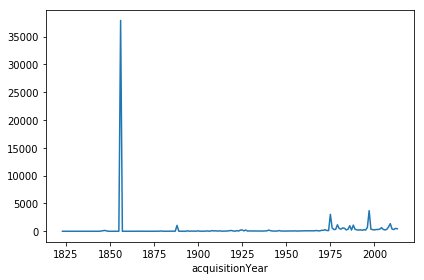

In [88]:
pl =acquisition_years.plot()

In [89]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [90]:
rcParams.update({'figure.autolayout':True,
                'axes.titlepad':20})

In [91]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [92]:
subplot = fig.add_subplot(1,1,1)

In [95]:
fig.savefig('f.png')

In [98]:
acquisition_years.plot(ax=subplot)

In [99]:
subplot.set_xlabel('Acquisition Years')
subplot.set_ylabel('Artworks Acquired')

Text(20.800000000000004, 0.5, 'Artworks Acquired')

In [100]:
fig.savefig('f.png')

![alt text](./f.png "Logo Title Text 1")